In [4]:
import json
import os
from collections import defaultdict
import numpy as np
from rouge import Rouge
from analysis_utils import *

In [5]:
data_files = {
    "chatgpt": [
        "/harddisk/user/keminglu/evaluation_corpus/wiki_aug_eval/full_chatgpt_data_v4_corpus_filtered_format_prompt_case_output.txt",
        "/harddisk/user/keminglu/evaluation_corpus/wiki_aug_eval/full_chatgpt_data_v4_corpus_filtered_2_format_prompt_case_output.txt",
        "/harddisk/user/keminglu/evaluation_corpus/wiki_aug_eval/full_chatgpt_data_v4_corpus_filtered_3_format_prompt_case_output.txt",
    ],
    "chatgpt_histroy": [
        "/harddisk/user/keminglu/evaluation_corpus/wiki_aug_eval/full_chatgpt_data_v4_corpus_filtered_oneshot_format_prompt_case_output.txt",
        "/harddisk/user/keminglu/evaluation_corpus/wiki_aug_eval/full_chatgpt_data_v4_corpus_filtered_2_oneshot_format_prompt_case_output.txt",
    ],
    "chatgpt_prompt_history": [
        "/harddisk/user/keminglu/evaluation_corpus/wiki_aug_eval/full_chatgpt_data_v4_corpus_filtered_oneshot_history_prompt_case_output.txt",
        "/harddisk/user/keminglu/evaluation_corpus/wiki_aug_eval/full_chatgpt_data_v4_corpus_filtered_2_oneshot_history_prompt_case_output.txt",
        "/harddisk/user/keminglu/evaluation_corpus/wiki_aug_eval/full_chatgpt_data_v4_corpus_filtered_3_oneshot_history_prompt_case_output.txt",
    ],
    "model_1b": [
        "/harddisk/user/keminglu/devcloud/corpus_filtered_test_prompt_rephrased_finetune_1b1_data_v4_epoch_1_output.txt",
        "/harddisk/user/keminglu/devcloud/corpus_filtered_test_prompt_rephrased_2_finetune_1b1_data_v4_epoch_1_output.txt",
        "/harddisk/user/keminglu/devcloud/corpus_filtered_test_prompt_rephrased_3_finetune_1b1_data_v4_epoch_1_output.txt",
    ],
    "model_7b": [
        "/harddisk/user/keminglu/devcloud/corpus_filtered_test_prompt_rephrased_finetune_7b_data_v4_step_4000_output.txt",
        "/harddisk/user/keminglu/devcloud/corpus_filtered_test_prompt_rephrased_2_finetune_7b_data_v4_step_4000_output.txt",
        "/harddisk/user/keminglu/devcloud/corpus_filtered_test_prompt_rephrased_3_finetune_7b_data_v4_step_4000_output.txt",
    ],
    #"model_7b_step_5000": [
    #    "/harddisk/user/keminglu/devcloud/corpus_filtered_test_prompt_rephrased_finetune_7b_data_v4_step_5000_output.txt",
    #    "/harddisk/user/keminglu/devcloud/corpus_filtered_test_prompt_rephrased_2_finetune_7b_data_v4_step_5000_output.txt",
    #    "/harddisk/user/keminglu/devcloud/corpus_filtered_test_prompt_rephrased_3_finetune_7b_data_v4_step_5000_output.txt",
    #],
    #"model_7b": [
    #    "/harddisk/user/keminglu/devcloud/corpus_filtered_test_prompt_rephrased_finetune_7b_data_v4_epoch_1_output.txt",
    #    "/harddisk/user/keminglu/devcloud/corpus_filtered_test_prompt_rephrased_2_finetune_7b_data_v4_epoch_1_output.txt",
    #    "/harddisk/user/keminglu/devcloud/corpus_filtered_test_prompt_rephrased_3_finetune_7b_data_v4_epoch_1_output.txt",
    #],
    }

# Main

In [6]:
handles = data_files.keys()
all_handle_results = {}
for handle in handles:
    print(f"Evaluating results for the method {handle}")
    all_results = defaultdict(dict)
    for idx, data_file in enumerate(data_files[handle]):
        data_split = load_data(data_file)
        default_mapping = get_default_mapping_dict(data_split)
        all_results[data_file]['t99_partial_ent_evaluation_report'] = get_partial_ent_evaluation(data_split, default_mapping, threshold=0.99)
        all_results[data_file]['t80_partial_ent_evaluation_report'] = get_partial_ent_evaluation(data_split, default_mapping, threshold=0.8)
        all_results[data_file]['decoder_failure_rate'] = get_decoder_failure_rate(data_split)
        all_results[data_file]['ent_num_constraint'] = get_ent_num_constraint_report(data_split)
        all_results[data_file]['ent_type_constraint'] = get_ent_type_constraint_report(data_split)
        all_results[data_file]['t99_ent_evaluation_report'] = get_ent_evaluation(data_split, threshold=0.99)
        all_results[data_file]['t80_ent_evaluation_report'] = get_ent_evaluation(data_split, threshold=0.8)
        all_results[data_file]['t99_ent_generalization_evaluation_report'] = get_ent_generalization_evaluation(data_split, threshold=0.99)
        all_results[data_file]['t80_ent_generalization_evaluation_report'] = get_ent_generalization_evaluation(data_split, threshold=0.8)
        relation_report, new_relation = get_open_relation_extraction_report(data_split, handle, collect_new_relations=((handle == 'model_7b') and (idx == 0)))
        all_results[data_file]['relation_report'] = relation_report
        all_results[data_file]['new_relation'] = new_relation
        generalization_relation_report = get_open_relation_extraction_generalization_report(data_split, handle)
        all_results[data_file]['generalization_relation_report'] = generalization_relation_report
        all_results[data_file]['info_generation_report'] = get_entity_info_correctness(data_split)
        all_results[data_file]['ent_type_evaluation_report'] = get_ent_type_evaluation(data_split)
        all_results[data_file]['ent_type_generalization_evaluation_report'] = get_ent_type_generalization_evaluation(data_split)
    all_handle_results[handle] = all_results

Evaluating results for the method chatgpt


INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_out_aug_default.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_out_aug_base_type.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_out_aug_importance.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_out_aug_rollup_type.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_out_aug_description.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_unseen_out_aug_default.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_seen_out_aug_default.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_unseen_out_aug_base_type.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_seen_out_aug_base_type.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_unseen_out_aug_importance.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_seen_out_aug_importance.tsv
INFO:root:Writing

Evaluating results for the method chatgpt_histroy


INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_histroy_out_aug_importance.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_histroy_out_aug_default.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_histroy_out_aug_base_type.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_histroy_out_aug_rollup_type.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_histroy_out_aug_description.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_histroy_unseen_out_aug_importance.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_histroy_seen_out_aug_importance.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_histroy_unseen_out_aug_default.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_histroy_seen_out_aug_default.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_histroy_unseen_out_aug_base_type.tsv
INFO:root:Writing PR curve o

Evaluating results for the method chatgpt_prompt_history


INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_out_aug_default.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_out_aug_importance.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_out_aug_base_type.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_out_aug_description.tsv


AUC: 0	 Optimal (precision, recall, F1): (0, 0, 0)



INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_out_aug_rollup_type.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_unseen_out_aug_default.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_seen_out_aug_default.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_unseen_out_aug_importance.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_seen_out_aug_importance.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_unseen_out_aug_base_type.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_seen_out_aug_base_type.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_unseen_out_aug_description.tsv


AUC: 0	 Optimal (precision, recall, F1): (0, 0, 0)



INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_seen_out_aug_description.tsv


AUC: 0	 Optimal (precision, recall, F1): (0, 0, 0)



INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_unseen_out_aug_rollup_type.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_seen_out_aug_rollup_type.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_out_aug_importance.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_out_aug_default.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_out_aug_base_type.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_out_aug_description.tsv


AUC: 0	 Optimal (precision, recall, F1): (0, 0, 0)



INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_out_aug_rollup_type.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_unseen_out_aug_importance.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_seen_out_aug_importance.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_unseen_out_aug_default.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_seen_out_aug_default.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_unseen_out_aug_base_type.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_seen_out_aug_base_type.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_unseen_out_aug_description.tsv


AUC: 0	 Optimal (precision, recall, F1): (0, 0, 0)



INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_seen_out_aug_description.tsv


AUC: 0	 Optimal (precision, recall, F1): (0, 0, 0)



INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_unseen_out_aug_rollup_type.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_seen_out_aug_rollup_type.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_out_aug_importance.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_out_aug_default.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_out_aug_base_type.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_out_aug_description.tsv


AUC: 0	 Optimal (precision, recall, F1): (0, 0, 0)



INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_out_aug_rollup_type.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_unseen_out_aug_importance.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_seen_out_aug_importance.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_unseen_out_aug_default.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_seen_out_aug_default.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_unseen_out_aug_base_type.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_seen_out_aug_base_type.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_unseen_out_aug_description.tsv


AUC: 0	 Optimal (precision, recall, F1): (0, 0, 0)



INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_seen_out_aug_description.tsv


AUC: 0	 Optimal (precision, recall, F1): (0, 0, 0)



INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_unseen_out_aug_rollup_type.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/chatgpt_prompt_history_seen_out_aug_rollup_type.tsv


Evaluating results for the method model_1b


INFO:root:Writing PR curve of TabReader to ./CaRB/files/model_1b_out_aug_default.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/model_1b_out_aug_importance.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/model_1b_out_aug_rollup_type.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/model_1b_out_aug_description.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/model_1b_out_aug_base_type.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/model_1b_unseen_out_aug_default.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/model_1b_seen_out_aug_default.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/model_1b_unseen_out_aug_importance.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/model_1b_seen_out_aug_importance.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/model_1b_unseen_out_aug_rollup_type.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/model_1b_seen_out_aug_rollup_type.tsv
IN

Evaluating results for the method model_7b


INFO:root:Writing PR curve of TabReader to ./CaRB/files/model_7b_out_aug_default.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/model_7b_out_aug_importance.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/model_7b_out_aug_rollup_type.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/model_7b_out_aug_description.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/model_7b_out_aug_base_type.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/model_7b_unseen_out_aug_default.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/model_7b_seen_out_aug_default.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/model_7b_unseen_out_aug_importance.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/model_7b_seen_out_aug_importance.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/model_7b_unseen_out_aug_rollup_type.tsv
INFO:root:Writing PR curve of TabReader to ./CaRB/files/model_7b_seen_out_aug_rollup_type.tsv
IN

In [27]:
# Saving calculated metrics
with open("all_handle_results.json", "w") as f:
    json.dump(all_handle_results, f)

# Appendix Tables

In [8]:
# Loading calculated metrics
with open("all_handle_results.json") as f:
    all_handle_results = json.load(f)

In [9]:
type_mapping = {
    "aug_default": "Default",
    "aug_base_type": "Base Type",
    "aug_rollup_type": "Abstract Type",
    "aug_description": "Description",
    "aug_importance": "Importance",
    "aug_ent_num": "Number",
    "aug_ent_num_and_base_type": "Number+Base Type",
    "aug_ent_num_and_rollup_type": "Number+Abstract Type",
}

In [10]:
methods = ['chatgpt', 'chatgpt_histroy', 'model_1b', 'model_7b']
task = "t80_ent_evaluation_report"
metrics = ["mention_precision", "mention_recall", "mention_f1"]
keys = ('aug_default', 'aug_base_type', 'aug_rollup_type', 'aug_description', 'aug_importance', None)
for key in keys:
    results = ["\t" + type_mapping[key] if key else '\tMacro Avg.', " & ".join(["$--$"] * len(metrics))]
    for method in methods:
        for metric in metrics:
            results.append(get_final_results(all_handle_results[method],
                    task=task,
                    aug_type=key,
                    metric=metric,
                ))
    row = " & ".join(results) + " \\\\"
    print(row)

	Default & $--$ & $--$ & $--$ & $53.4_{0.1}$ & $57.5_{0.2}$ & $55.4_{0.1}$ & $51.2_{0.1}$ & $51.9_{0.1}$ & $51.6_{0.1}$ & $71.1_{0.0}$ & $57.3_{0.0}$ & $63.5_{0.0}$ & $82.0_{0.0}$ & $76.4_{0.0}$ & $79.1_{0.0}$ \\
	Base Type & $--$ & $--$ & $--$ & $41.9_{0.4}$ & $66.3_{1.0}$ & $51.4_{0.6}$ & $47.9_{0.1}$ & $66.8_{0.3}$ & $55.8_{0.2}$ & $65.8_{0.1}$ & $58.5_{0.0}$ & $61.9_{0.1}$ & $76.0_{0.2}$ & $80.2_{0.1}$ & $78.1_{0.1}$ \\
	Abstract Type & $--$ & $--$ & $--$ & $38.2_{0.4}$ & $62.5_{0.2}$ & $47.4_{0.3}$ & $42.5_{0.3}$ & $57.1_{0.1}$ & $48.7_{0.2}$ & $61.2_{0.1}$ & $54.9_{0.2}$ & $57.9_{0.1}$ & $76.8_{0.1}$ & $78.3_{0.2}$ & $77.5_{0.2}$ \\
	Description & $--$ & $--$ & $--$ & $43.9_{0.2}$ & $61.1_{0.4}$ & $51.1_{0.0}$ & $44.7_{0.0}$ & $60.9_{0.2}$ & $51.6_{0.1}$ & $65.9_{0.1}$ & $60.8_{0.6}$ & $63.2_{0.3}$ & $88.7_{0.1}$ & $88.4_{0.1}$ & $88.5_{0.1}$ \\
	Importance & $--$ & $--$ & $--$ & $46.8_{0.5}$ & $47.9_{0.2}$ & $47.4_{0.3}$ & $47.5_{0.4}$ & $48.2_{0.1}$ & $47.8_{0.1}$ & $64.1_{0.1}

In [11]:
methods = ['chatgpt', 'chatgpt_histroy', 'model_1b', 'model_7b']
tasks = ["t99_ent_evaluation_report", "t80_ent_evaluation_report"]
metric = "title_f1"
keys = ('aug_default', 'aug_base_type', 'aug_rollup_type', 'aug_description', 'aug_importance', None)
for key in keys:
    results = ["\t" + type_mapping[key] if key else '\tMacro Avg.', " & ".join(["$--$"] * len(tasks))]
    for method in methods:
        for task in tasks:
            results.append(get_final_results(all_handle_results[method],
                    task=task,
                    aug_type=key,
                    metric=metric,
                ))
    row = " & ".join(results) + " \\\\"
    print(row)

	Default & $--$ & $--$ & $27.4_{0.1}$ & $28.3_{0.0}$ & $39.6_{0.0}$ & $41.0_{0.0}$ & $50.3_{0.0}$ & $51.3_{0.0}$ & $69.4_{0.1}$ & $70.1_{0.0}$ \\
	Base Type & $--$ & $--$ & $27.4_{0.4}$ & $28.8_{0.4}$ & $40.8_{0.4}$ & $42.3_{0.4}$ & $50.4_{0.0}$ & $51.4_{0.1}$ & $68.5_{0.1}$ & $69.3_{0.1}$ \\
	Abstract Type & $--$ & $--$ & $19.3_{0.5}$ & $20.4_{0.6}$ & $37.1_{0.3}$ & $38.6_{0.3}$ & $47.6_{0.2}$ & $48.4_{0.2}$ & $68.7_{0.2}$ & $69.2_{0.2}$ \\
	Description & $--$ & $--$ & $24.2_{0.3}$ & $24.9_{0.1}$ & $38.5_{0.0}$ & $39.4_{0.0}$ & $51.2_{0.2}$ & $52.1_{0.2}$ & $76.4_{0.1}$ & $77.5_{0.1}$ \\
	Importance & $--$ & $--$ & $26.7_{0.4}$ & $28.0_{0.4}$ & $36.8_{0.1}$ & $38.2_{0.0}$ & $48.7_{0.2}$ & $49.8_{0.3}$ & $66.2_{0.1}$ & $67.2_{0.1}$ \\
	Macro Avg. & $--$ & $--$ & $25.0_{0.2}$ & $26.1_{0.2}$ & $38.6_{0.0}$ & $39.9_{0.0}$ & $49.6_{0.0}$ & $50.6_{0.0}$ & $69.8_{0.1}$ & $70.7_{0.1}$ \\


In [9]:
methods = ['chatgpt', 'chatgpt_histroy', 'model_1b', 'model_7b']
task = "t80_ent_generalization_evaluation_report"
metrics = ["seen_mention_recall", "unseen_mention_recall"]
keys = ('aug_default', 'aug_base_type', 'aug_rollup_type', 'aug_description', 'aug_importance', None)
for i, metric in enumerate(metrics):
    for j, key in enumerate(keys):
        if i == 0 and j == 0:
            results = ["\t \multirow{6}{*}{\makecell[c]{Before\\\\05/30/2022}} & " + type_mapping[key] if key else '\tMacro Avg.', "$--$"]
        elif i == 1 and j == 0:
            results = ["\t \multirow{6}{*}{\makecell[c]{After\\\\05/30/2022}} & " + type_mapping[key] if key else '\tMacro Avg.', "$--$"]
        else:
            results = ["\t & " + type_mapping[key] if key else '\t& Macro Avg.', "$--$"]
        for method in methods:
                results.append(get_final_results(all_handle_results[method],
                        task=task,
                        aug_type=key,
                        metric=metric,
                    ))
        row = " & ".join(results) + " \\\\"
        if j == len(keys) - 1:
            print("\t\cline{2-7}")
        print(row)
        if j == len(keys) - 1 and i == 0:
            print("\t\midrule")

	 \multirow{6}{*}{\makecell[c]{Before\\05/30/2022}} & Default & $--$ & $56.5_{0.2}$ & $50.1_{0.2}$ & $56.8_{0.0}$ & $77.8_{0.0}$ \\
	 & Base Type & $--$ & $66.1_{1.2}$ & $65.4_{0.5}$ & $59.4_{0.2}$ & $86.5_{0.1}$ \\
	 & Abstract Type & $--$ & $63.6_{0.7}$ & $56.7_{0.1}$ & $56.4_{0.1}$ & $82.9_{0.1}$ \\
	 & Description & $--$ & $60.9_{0.3}$ & $61.1_{0.2}$ & $62.8_{0.8}$ & $90.4_{0.1}$ \\
	 & Importance & $--$ & $49.1_{0.1}$ & $49.0_{0.1}$ & $60.7_{0.6}$ & $80.7_{0.1}$ \\
	\cline{2-7}
	& Macro Avg. & $--$ & $59.3_{0.3}$ & $56.5_{0.0}$ & $59.2_{0.1}$ & $83.7_{0.0}$ \\
	\midrule
	 \multirow{6}{*}{\makecell[c]{After\\05/30/2022}} & Default & $--$ & $60.5_{0.1}$ & $57.4_{0.2}$ & $58.7_{0.0}$ & $71.8_{0.0}$ \\
	 & Base Type & $--$ & $66.7_{1.1}$ & $69.0_{0.0}$ & $57.1_{0.2}$ & $70.4_{0.4}$ \\
	 & Abstract Type & $--$ & $60.6_{0.8}$ & $57.8_{0.0}$ & $52.5_{0.4}$ & $70.9_{0.5}$ \\
	 & Description & $--$ & $61.5_{0.6}$ & $60.5_{0.2}$ & $56.5_{0.2}$ & $84.1_{0.2}$ \\
	 & Importance & $--$ & $45.3

In [10]:
methods = ['chatgpt', 'chatgpt_histroy', 'model_1b', 'model_7b']
tasks = ["t99_ent_generalization_evaluation_report", "t80_ent_generalization_evaluation_report"]
metrics = ["seen_title_recall", "unseen_title_recall"]
keys = ('aug_default', 'aug_base_type', 'aug_rollup_type', 'aug_description', 'aug_importance', None)
for i, metric in enumerate(metrics):
    for j, key in enumerate(keys):
        if i == 0 and j == 0:
            results = ["\t \multirow{6}{*}{\makecell[c]{Before\\\\05/30/2022}} & " + type_mapping[key] if key else '\tMacro Avg.', " & ".join(["$--$"] * len(tasks))]
        elif i == 1 and j == 0:
            results = ["\t \multirow{6}{*}{\makecell[c]{After\\\\05/30/2022}} & " + type_mapping[key] if key else '\tMacro Avg.', " & ".join(["$--$"] * len(tasks))]
        else:
            results = ["\t & " + type_mapping[key] if key else '\t& Macro Avg.', " & ".join(["$--$"] * len(tasks))]
        for method in methods:
            for task in tasks:
                results.append(get_final_results(all_handle_results[method],
                        task=task,
                        aug_type=key,
                        metric=metric,
                    ))
        row = " & ".join(results) + " \\\\"
        if j == len(keys) - 1:
            print("\t\cline{2-12}")
        print(row)
        if j == len(keys) - 1 and i == 0:
            print("\t\midrule")

	 \multirow{6}{*}{\makecell[c]{Before\\05/30/2022}} & Default & $--$ & $--$ & $29.6_{0.1}$ & $30.2_{0.1}$ & $40.2_{0.1}$ & $41.0_{0.1}$ & $48.5_{0.0}$ & $49.0_{0.0}$ & $73.0_{0.0}$ & $73.3_{0.0}$ \\
	 & Base Type & $--$ & $--$ & $39.3_{0.5}$ & $39.7_{0.4}$ & $50.4_{0.9}$ & $51.0_{0.9}$ & $52.9_{0.0}$ & $53.0_{0.0}$ & $81.6_{0.1}$ & $81.8_{0.1}$ \\
	 & Abstract Type & $--$ & $--$ & $29.5_{0.9}$ & $29.9_{0.9}$ & $47.8_{0.2}$ & $48.3_{0.2}$ & $49.5_{0.1}$ & $49.8_{0.1}$ & $78.0_{0.3}$ & $78.1_{0.3}$ \\
	 & Description & $--$ & $--$ & $30.9_{0.7}$ & $31.2_{0.7}$ & $47.7_{0.1}$ & $48.3_{0.1}$ & $55.5_{0.6}$ & $55.8_{0.6}$ & $85.3_{0.2}$ & $85.7_{0.2}$ \\
	 & Importance & $--$ & $--$ & $29.8_{0.6}$ & $30.4_{0.6}$ & $39.1_{0.2}$ & $39.9_{0.1}$ & $52.7_{0.5}$ & $53.3_{0.5}$ & $76.3_{0.0}$ & $76.6_{0.0}$ \\
	\cline{2-12}
	& Macro Avg. & $--$ & $--$ & $31.8_{0.2}$ & $32.3_{0.2}$ & $45.0_{0.1}$ & $45.7_{0.1}$ & $51.8_{0.0}$ & $52.2_{0.0}$ & $78.8_{0.1}$ & $79.1_{0.1}$ \\
	\midrule
	 \multirow{6}{

In [11]:
methods = ['chatgpt', 'chatgpt_histroy', 'model_1b', 'model_7b']
task = "relation_report"
metrics = ["carb_p", "carb_r", "carb_f1"]
keys = ('aug_default', 'aug_base_type', 'aug_rollup_type', 'aug_description', 'aug_importance', None)
for key in keys:
    results = ["\t" + type_mapping[key] if key else '\tMacro Avg.', " & ".join(["$--$"] * len(metrics))]
    for method in methods:
        for metric in metrics:
            results.append(get_final_results(all_handle_results[method],
                    task=task,
                    aug_type=key,
                    metric=metric,
                ))
    row = " & ".join(results) + " \\\\"
    print(row)

	Default & $--$ & $--$ & $--$ & $17.8_{0.0}$ & $36.9_{0.1}$ & $23.7_{0.5}$ & $16.4_{0.0}$ & $37.8_{0.2}$ & $22.0_{0.0}$ & $54.1_{0.0}$ & $55.8_{0.0}$ & $54.0_{0.0}$ & $65.7_{0.1}$ & $68.1_{0.0}$ & $66.3_{0.5}$ \\
	Base Type & $--$ & $--$ & $--$ & $16.1_{0.3}$ & $34.6_{1.3}$ & $21.7_{0.5}$ & $15.2_{0.1}$ & $43.0_{0.3}$ & $22.0_{0.0}$ & $56.6_{0.7}$ & $61.6_{0.5}$ & $58.3_{0.5}$ & $60.3_{1.2}$ & $75.7_{0.4}$ & $66.7_{0.9}$ \\
	Abstract Type & $--$ & $--$ & $--$ & $15.7_{0.6}$ & $37.8_{0.3}$ & $22.0_{0.8}$ & $14.6_{0.4}$ & $46.4_{0.6}$ & $21.5_{0.5}$ & $56.7_{1.0}$ & $54.5_{0.1}$ & $55.0_{0.8}$ & $66.4_{0.3}$ & $71.5_{0.1}$ & $68.3_{0.5}$ \\
	Description & $--$ & $--$ & $--$ & $16.6_{0.1}$ & $35.8_{0.3}$ & $22.0_{0.0}$ & $12.0_{0.2}$ & $35.2_{0.8}$ & $17.5_{0.5}$ & $52.3_{0.6}$ & $63.8_{0.6}$ & $57.0_{0.0}$ & $69.3_{0.4}$ & $77.7_{0.1}$ & $73.0_{0.0}$ \\
	Importance & $--$ & $--$ & $--$ & $18.1_{0.2}$ & $35.8_{0.4}$ & $23.7_{0.5}$ & $17.2_{0.3}$ & $39.6_{0.1}$ & $23.5_{0.5}$ & $54.9_{0.3}

In [12]:
methods = ['chatgpt', 'chatgpt_histroy', 'model_1b', 'model_7b']
task = "generalization_relation_report"
metrics = ["seen_carb_r", "unseen_carb_r"]
keys = ('aug_default', 'aug_base_type', 'aug_rollup_type', 'aug_description', 'aug_importance', None)
for i, metric in enumerate(metrics):
    for j, key in enumerate(keys):
        if i == 0 and j == 0:
            results = ["\t \multirow{6}{*}{\makecell[c]{Before\\\\05/30/2022}} & " + type_mapping[key] if key else '\tMacro Avg.', " & ".join(["$--$"] * 1)]
        elif i == 1 and j == 0:
            results = ["\t \multirow{6}{*}{\makecell[c]{After\\\\05/30/2022}} & " + type_mapping[key] if key else '\tMacro Avg.', " & ".join(["$--$"] * 1)]
        else:
            results = ["\t & " + type_mapping[key] if key else '\t& Macro Avg.', " & ".join(["$--$"] * 1)]
        for method in methods:
            results.append(get_final_results(all_handle_results[method],
                    task=task,
                    aug_type=key,
                    metric=metric,
                ))
        row = " & ".join(results) + " \\\\"
        if j == len(keys) - 1:
            print("\t\cline{2-7}")
        print(row)
        if j == len(keys) - 1 and i == 0:
            print("\t\midrule")

	 \multirow{6}{*}{\makecell[c]{Before\\05/30/2022}} & Default & $--$ & $35.1_{0.1}$ & $35.9_{0.1}$ & $57.7_{0.0}$ & $73.3_{0.0}$ \\
	 & Base Type & $--$ & $32.1_{1.7}$ & $40.4_{0.8}$ & $63.6_{0.6}$ & $83.7_{0.5}$ \\
	 & Abstract Type & $--$ & $36.0_{0.6}$ & $43.7_{0.6}$ & $58.8_{0.1}$ & $78.4_{0.1}$ \\
	 & Description & $--$ & $33.3_{0.5}$ & $33.0_{0.7}$ & $67.9_{0.6}$ & $84.1_{0.1}$ \\
	 & Importance & $--$ & $34.2_{0.5}$ & $38.5_{0.2}$ & $61.0_{0.6}$ & $77.4_{0.2}$ \\
	\cline{2-7}
	& Macro Avg. & $--$ & $34.1_{0.2}$ & $38.3_{0.0}$ & $61.8_{0.3}$ & $79.4_{0.1}$ \\
	\midrule
	 \multirow{6}{*}{\makecell[c]{After\\05/30/2022}} & Default & $--$ & $32.7_{0.2}$ & $34.0_{0.2}$ & $35.8_{0.1}$ & $36.1_{0.1}$ \\
	 & Base Type & $--$ & $23.6_{0.8}$ & $27.8_{0.6}$ & $39.5_{0.2}$ & $37.9_{0.2}$ \\
	 & Abstract Type & $--$ & $28.0_{1.1}$ & $33.5_{1.3}$ & $32.6_{0.0}$ & $36.4_{0.4}$ \\
	 & Description & $--$ & $24.8_{0.2}$ & $22.4_{0.5}$ & $30.3_{0.4}$ & $35.3_{0.2}$ \\
	 & Importance & $--$ & $26.2

In [18]:
methods = ['chatgpt', 'chatgpt_histroy', 'model_1b', 'model_7b']
task = "decoder_failure_rate"
keys = ('aug_default', 'aug_base_type', 'aug_rollup_type', 'aug_description', 'aug_importance', 'aug_ent_num', 'aug_ent_num_and_base_type', 'aug_ent_num_and_rollup_type', None)
for j, key in enumerate(keys):
    results = ["\t" + type_mapping[key] if key else '\tMacro Avg.']

    for method in methods:
        results.append(get_final_results(all_handle_results[method],
                task=task,
                aug_type=key,
                metric=None,
            ))
    row = " & ".join(results) + " \\\\"
    if j == len(keys) - 1:
        print("\t\midrule")
    print(row)

	Default & $2.5_{0.1}$ & $1.9_{0.1}$ & $10.7_{0.0}$ & $0.0_{0.0}$ \\
	Base Type & $3.4_{0.3}$ & $3.6_{0.4}$ & $5.3_{0.2}$ & $0.0_{0.0}$ \\
	Abstract Type & $3.8_{0.4}$ & $2.5_{0.8}$ & $4.3_{0.2}$ & $0.0_{0.0}$ \\
	Description & $3.1_{0.3}$ & $2.2_{0.2}$ & $7.3_{0.3}$ & $0.0_{0.0}$ \\
	Importance & $3.9_{0.6}$ & $3.9_{0.9}$ & $3.9_{0.3}$ & $0.0_{0.0}$ \\
	Number & $2.7_{0.5}$ & $3.7_{0.1}$ & $4.3_{0.1}$ & $0.0_{0.0}$ \\
	Number+Base Type & $3.5_{0.2}$ & $5.5_{0.3}$ & $4.8_{0.1}$ & $0.0_{0.0}$ \\
	Number+Abstract Type & $3.6_{0.4}$ & $2.8_{1.0}$ & $3.3_{0.4}$ & $0.0_{0.1}$ \\
	\midrule
	Macro Avg. & $3.3_{0.2}$ & $3.3_{0.4}$ & $5.5_{0.0}$ & $0.0_{0.0}$ \\


In [19]:
methods = ['chatgpt', 'chatgpt_histroy', 'model_1b', 'model_7b']
task = "ent_num_constraint"
keys = ('aug_ent_num', 'aug_importance', 'aug_ent_num_and_base_type', 'aug_ent_num_and_rollup_type', None)
for j, key in enumerate(keys):
    results = ["\t" + type_mapping[key] if key else '\tMacro Avg.']

    for method in methods:
        results.append(get_final_results(all_handle_results[method],
                task=task,
                aug_type=key,
                metric=None,
                neg=True
            ))
    row = " & ".join(results) + " \\\\"
    if j == len(keys) - 1:
        print("\t\midrule")
    print(row)

	Number & $26.8_{0.4}$ & $13.4_{0.5}$ & $6.5_{0.0}$ & $0.6_{0.0}$ \\
	Importance & $25.6_{1.1}$ & $18.7_{0.2}$ & $7.9_{0.3}$ & $0.8_{0.0}$ \\
	Number+Base Type & $43.4_{0.4}$ & $37.3_{0.0}$ & $38.0_{0.9}$ & $29.0_{0.2}$ \\
	Number+Abstract Type & $48.3_{0.9}$ & $40.8_{0.4}$ & $42.3_{0.8}$ & $37.3_{0.1}$ \\
	\midrule
	Macro Avg. & $36.0_{0.1}$ & $27.5_{0.0}$ & $23.7_{0.1}$ & $16.9_{0.0}$ \\


In [20]:
methods = ['chatgpt', 'chatgpt_histroy', 'model_1b', 'model_7b']
task = "ent_type_constraint"
keys = ('aug_base_type', 'aug_rollup_type', 'aug_ent_num_and_base_type', 'aug_ent_num_and_rollup_type', None)
for j, key in enumerate(keys):
    results = ["\t" + type_mapping[key] if key else '\tMacro Avg.']

    for method in methods:
        results.append(get_final_results(all_handle_results[method],
                task=task,
                aug_type=key,
                metric=None,
                neg=True
            ))
    row = " & ".join(results) + " \\\\"
    if j == len(keys) - 1:
        print("\t\midrule")
    print(row)

	Base Type & $72.4_{0.8}$ & $48.8_{0.1}$ & $38.1_{0.3}$ & $22.4_{0.6}$ \\
	Abstract Type & $65.1_{2.1}$ & $50.7_{0.7}$ & $16.9_{0.3}$ & $4.1_{0.2}$ \\
	Number+Base Type & $65.8_{0.5}$ & $47.3_{0.4}$ & $42.5_{0.8}$ & $24.7_{0.3}$ \\
	Number+Abstract Type & $57.1_{1.6}$ & $43.5_{0.8}$ & $31.1_{0.7}$ & $25.5_{1.5}$ \\
	\midrule
	Macro Avg. & $65.1_{0.8}$ & $47.6_{0.1}$ & $32.2_{0.5}$ & $19.2_{0.5}$ \\


In [13]:
methods = ['chatgpt', 'chatgpt_histroy', 'model_1b', 'model_7b']
task = "ent_type_evaluation_report"
metrics = ["p", "r", "f"]
keys = ('aug_default', 'aug_base_type', 'aug_rollup_type', 'aug_description', 'aug_importance', None)
for key in keys:
    results = ["\t" + type_mapping[key] if key else '\tMacro Avg.']
    for method in methods:
        for metric in metrics:
            results.append(get_final_results(all_handle_results[method],
                    task=task,
                    aug_type=key,
                    metric=metric,
                ))
    row = " & ".join(results) + " \\\\"
    print(row)

	Default & $2.7_{0.0}$ & $3.8_{0.0}$ & $3.1_{0.0}$ & $6.4_{0.0}$ & $7.5_{0.0}$ & $6.9_{0.0}$ & $46.3_{0.1}$ & $37.9_{0.1}$ & $41.7_{0.1}$ & $61.3_{0.0}$ & $55.3_{0.0}$ & $58.1_{0.0}$ \\
	Base Type & $13.0_{0.3}$ & $19.4_{0.5}$ & $15.6_{0.4}$ & $29.9_{0.2}$ & $35.0_{0.4}$ & $32.3_{0.3}$ & $46.0_{0.1}$ & $39.9_{0.2}$ & $42.7_{0.1}$ & $59.3_{0.2}$ & $57.6_{0.1}$ & $58.4_{0.1}$ \\
	Abstract Type & $8.9_{0.5}$ & $7.5_{0.2}$ & $8.2_{0.3}$ & $16.2_{0.3}$ & $18.2_{0.2}$ & $17.1_{0.3}$ & $42.7_{0.2}$ & $35.6_{0.0}$ & $38.8_{0.1}$ & $62.3_{0.3}$ & $53.9_{0.1}$ & $57.8_{0.1}$ \\
	Description & $2.3_{0.1}$ & $4.4_{0.1}$ & $3.1_{0.1}$ & $6.4_{0.1}$ & $6.5_{0.1}$ & $6.4_{0.1}$ & $44.9_{0.1}$ & $43.8_{0.4}$ & $44.4_{0.1}$ & $64.1_{0.1}$ & $63.2_{0.1}$ & $63.6_{0.1}$ \\
	Importance & $2.6_{0.2}$ & $3.8_{0.3}$ & $3.1_{0.2}$ & $5.9_{0.0}$ & $7.2_{0.1}$ & $6.5_{0.0}$ & $39.5_{0.2}$ & $39.5_{0.3}$ & $39.5_{0.1}$ & $50.6_{0.0}$ & $53.4_{0.1}$ & $52.0_{0.0}$ \\
	Macro Avg. & $7.5_{0.1}$ & $8.8_{0.0}$ & $7.9

In [14]:
methods = ['chatgpt', 'chatgpt_histroy', 'model_1b', 'model_7b']
task = "ent_type_generalization_evaluation_report"
metric_groups = [
    ["seen_r"],
    ["unseen_r"],
]
keys = ('aug_default', 'aug_base_type', 'aug_rollup_type', 'aug_description', 'aug_importance', None)
for i, metric_group in enumerate(metric_groups):
    for j, key in enumerate(keys):
        if i == 0 and j == 0:
            results = ["\t \multirow{6}{*}{\makecell[c]{Before\\\\05/30/2022}} & " + type_mapping[key] if key else '\tMacro Avg.']
        elif i == 1 and j == 0:
            results = ["\t \multirow{6}{*}{\makecell[c]{After\\\\05/30/2022}} & " + type_mapping[key] if key else '\tMacro Avg.']
        else:
            results = ["\t & " + type_mapping[key] if key else '\t& Macro Avg.']
        for method in methods:
            for metric in metric_group:
                results.append(get_final_results(all_handle_results[method],
                        task=task,
                        aug_type=key,
                        metric=metric,
                    ))
        row = " & ".join(results) + " \\\\"
        if j == len(keys) - 1:
            print("\t\cline{2-7}")
        print(row)
        if j == len(keys) - 1 and i == 0:
            print("\t\midrule")

	 \multirow{6}{*}{\makecell[c]{Before\\05/30/2022}} & Default & $4.0_{0.0}$ & $7.8_{0.1}$ & $41.9_{0.1}$ & $63.4_{0.0}$ \\
	 & Base Type & $21.1_{0.4}$ & $34.4_{0.7}$ & $46.2_{0.2}$ & $71.3_{0.1}$ \\
	 & Abstract Type & $8.4_{0.2}$ & $19.2_{0.1}$ & $40.0_{0.0}$ & $65.6_{0.3}$ \\
	 & Description & $5.0_{0.1}$ & $7.6_{0.1}$ & $50.6_{0.5}$ & $73.3_{0.1}$ \\
	 & Importance & $4.2_{0.5}$ & $7.6_{0.3}$ & $47.1_{0.3}$ & $65.5_{0.1}$ \\
	\cline{2-7}
	& Macro Avg. & $9.7_{0.1}$ & $15.9_{0.2}$ & $44.4_{0.1}$ & $66.8_{0.1}$ \\
	\midrule
	 \multirow{6}{*}{\makecell[c]{After\\05/30/2022}} & Default & $2.6_{0.0}$ & $5.9_{0.3}$ & $17.7_{0.1}$ & $13.8_{0.0}$ \\
	 & Base Type & $16.1_{0.6}$ & $36.2_{0.0}$ & $27.2_{0.3}$ & $30.2_{0.0}$ \\
	 & Abstract Type & $5.8_{0.5}$ & $16.3_{0.3}$ & $27.4_{0.1}$ & $32.2_{0.3}$ \\
	 & Description & $2.7_{0.4}$ & $3.1_{0.2}$ & $21.0_{0.2}$ & $29.1_{0.1}$ \\
	 & Importance & $2.7_{0.4}$ & $6.0_{0.9}$ & $12.7_{0.1}$ & $10.7_{0.2}$ \\
	\cline{2-7}
	& Macro Avg. & $6.9_{0

In [15]:
methods = ['chatgpt', 'chatgpt_histroy', 'model_1b', 'model_7b']
task = "info_generation_report"
metric_groups = [
    ["seen_desc_rouge"],
    ["unseen_desc_rouge"],
]
keys = ('aug_default', 'aug_base_type', 'aug_rollup_type', 'aug_description', 'aug_importance', None)
for i, metric_group in enumerate(metric_groups):
    for j, key in enumerate(keys):
        if i == 0 and j == 0:
            results = ["\t \multirow{6}{*}{\makecell[c]{Before\\\\05/30/2022}} & " + type_mapping[key] if key else '\tMacro Avg.']
        elif i == 1 and j == 0:
            results = ["\t \multirow{6}{*}{\makecell[c]{After\\\\05/30/2022}} & " + type_mapping[key] if key else '\tMacro Avg.']
        else:
            results = ["\t & " + type_mapping[key] if key else '\t& Macro Avg.']
        for method in methods:
            for metric in metric_group:
                results.append(get_final_results(all_handle_results[method],
                        task=task,
                        aug_type=key,
                        metric=metric,
                    ))
        row = " & ".join(results) + " \\\\"
        if j == len(keys) - 1:
            print("\t\cline{2-7}")
        print(row)
        if j == len(keys) - 1 and i == 0:
            print("\t\midrule")

	 \multirow{6}{*}{\makecell[c]{Before\\05/30/2022}} & Default & $36.2_{0.2}$ & $46.3_{0.1}$ & $74.3_{0.0}$ & $83.4_{0.0}$ \\
	 & Base Type & $38.9_{0.6}$ & $48.7_{0.2}$ & $67.4_{0.1}$ & $79.5_{0.1}$ \\
	 & Abstract Type & $40.6_{1.5}$ & $56.2_{1.4}$ & $67.5_{0.4}$ & $81.3_{0.1}$ \\
	 & Description & $57.8_{0.5}$ & $85.9_{0.6}$ & $75.8_{0.3}$ & $86.8_{0.1}$ \\
	 & Importance & $38.2_{0.5}$ & $46.5_{0.1}$ & $75.9_{0.2}$ & $84.6_{0.1}$ \\
	\cline{2-7}
	& Macro Avg. & $40.2_{0.4}$ & $53.6_{0.2}$ & $71.4_{0.1}$ & $82.5_{0.0}$ \\
	\midrule
	 \multirow{6}{*}{\makecell[c]{After\\05/30/2022}} & Default & $36.8_{0.3}$ & $45.0_{0.2}$ & $51.6_{0.1}$ & $60.7_{0.1}$ \\
	 & Base Type & $37.9_{0.9}$ & $44.6_{1.1}$ & $54.7_{0.4}$ & $60.0_{0.3}$ \\
	 & Abstract Type & $28.7_{0.3}$ & $44.1_{0.8}$ & $51.3_{0.4}$ & $58.8_{0.0}$ \\
	 & Description & $47.7_{0.7}$ & $75.9_{0.6}$ & $81.5_{0.6}$ & $93.1_{0.2}$ \\
	 & Importance & $36.0_{1.1}$ & $44.1_{0.8}$ & $45.0_{0.8}$ & $57.9_{0.3}$ \\
	\cline{2-7}
	& Macro

In [16]:
methods = ['chatgpt', 'chatgpt_histroy', 'model_1b', 'model_7b']
task = "info_generation_report"
metric_groups = [
    ["seen_aliases_r"],
    ["unseen_aliases_r"],
]
keys = ('aug_default', 'aug_base_type', 'aug_rollup_type', 'aug_description', 'aug_importance', None)
for i, metric_group in enumerate(metric_groups):
    for j, key in enumerate(keys):
        if i == 0 and j == 0:
            results = ["\t \multirow{6}{*}{\makecell[c]{Before\\\\05/30/2022}} & " + type_mapping[key] if key else '\tMacro Avg.']
        elif i == 1 and j == 0:
            results = ["\t \multirow{6}{*}{\makecell[c]{After\\\\05/30/2022}} & " + type_mapping[key] if key else '\tMacro Avg.']
        else:
            results = ["\t & " + type_mapping[key] if key else '\t& Macro Avg.']
        for method in methods:
            for metric in metric_group:
                results.append(get_final_results(all_handle_results[method],
                        task=task,
                        aug_type=key,
                        metric=metric,
                    ))
        row = " & ".join(results) + " \\\\"
        if j == len(keys) - 1:
            print("\t\cline{2-7}")
        print(row)
        if j == len(keys) - 1 and i == 0:
            print("\t\midrule")

	 \multirow{6}{*}{\makecell[c]{Before\\05/30/2022}} & Default & $8.5_{0.1}$ & $1.1_{0.0}$ & $69.8_{0.0}$ & $78.0_{0.0}$ \\
	 & Base Type & $9.1_{0.4}$ & $7.7_{0.2}$ & $71.3_{0.1}$ & $76.7_{0.1}$ \\
	 & Abstract Type & $10.1_{0.4}$ & $14.8_{0.2}$ & $67.3_{0.4}$ & $78.7_{0.2}$ \\
	 & Description & $10.1_{0.4}$ & $19.4_{0.5}$ & $65.6_{0.2}$ & $76.2_{0.1}$ \\
	 & Importance & $10.1_{0.6}$ & $1.1_{0.3}$ & $75.1_{0.1}$ & $81.6_{0.1}$ \\
	\cline{2-7}
	& Macro Avg. & $10.1_{0.1}$ & $8.4_{0.0}$ & $69.7_{0.1}$ & $78.0_{0.0}$ \\
	\midrule
	 \multirow{6}{*}{\makecell[c]{After\\05/30/2022}} & Default & $10.9_{0.6}$ & $1.8_{0.1}$ & $16.9_{0.1}$ & $21.1_{0.1}$ \\
	 & Base Type & $14.6_{1.3}$ & $11.9_{1.8}$ & $22.7_{0.3}$ & $24.5_{0.5}$ \\
	 & Abstract Type & $17.1_{2.5}$ & $21.4_{1.3}$ & $23.6_{0.2}$ & $27.5_{0.3}$ \\
	 & Description & $15.7_{1.6}$ & $37.4_{1.2}$ & $18.9_{0.1}$ & $17.9_{0.3}$ \\
	 & Importance & $14.0_{1.4}$ & $1.8_{0.2}$ & $24.5_{0.2}$ & $28.7_{0.2}$ \\
	\cline{2-7}
	& Macro Avg. & 

In [17]:
methods = ['chatgpt', 'chatgpt_histroy', 'model_1b', 'model_7b']
tasks = [
        "t99_partial_ent_evaluation_report",
        "t80_partial_ent_evaluation_report"
    ]
metrics = ["mention_precision", "title_precision"]
keys = ('aug_ent_num', 'aug_ent_num_and_base_type', 'aug_ent_num_and_rollup_type', None)
for key in keys:
    results = ["\t" + type_mapping[key] if key else '\tMacro Avg.']
    for method in methods:
        for metric in metrics:
            for i, task in enumerate(tasks):
                if i == 1 and metric == 'mention_precision':
                    continue
                results.append(get_final_results(all_handle_results[method],
                        task=task,
                        aug_type=key,
                        metric=metric,
                    ))
    row = " & ".join(results) + " \\\\"
    print(row)

	Number & $51.4_{0.1}$ & $24.8_{0.6}$ & $25.9_{0.7}$ & $49.0_{0.1}$ & $37.5_{0.2}$ & $39.1_{0.2}$ & $69.9_{0.1}$ & $55.9_{0.1}$ & $57.1_{0.1}$ & $81.3_{0.1}$ & $71.3_{0.1}$ & $72.2_{0.1}$ \\
	Number+Base Type & $53.1_{0.3}$ & $25.8_{0.3}$ & $27.1_{0.2}$ & $50.3_{0.0}$ & $38.4_{0.1}$ & $40.1_{0.0}$ & $69.4_{0.2}$ & $55.2_{0.2}$ & $56.9_{0.2}$ & $80.8_{0.1}$ & $71.2_{0.1}$ & $72.2_{0.1}$ \\
	Number+Abstract Type & $53.3_{0.5}$ & $25.0_{0.2}$ & $26.2_{0.1}$ & $51.1_{0.1}$ & $38.0_{0.1}$ & $39.5_{0.1}$ & $72.4_{0.3}$ & $57.4_{0.2}$ & $59.0_{0.2}$ & $82.0_{0.1}$ & $73.6_{0.2}$ & $74.3_{0.2}$ \\
	Macro Avg. & $52.6_{0.3}$ & $25.2_{0.1}$ & $26.4_{0.2}$ & $50.1_{0.0}$ & $38.0_{0.1}$ & $39.6_{0.1}$ & $70.6_{0.1}$ & $56.2_{0.0}$ & $57.7_{0.0}$ & $81.4_{0.1}$ & $72.0_{0.1}$ & $72.9_{0.1}$ \\


# Result Tables

In [23]:
method_mapping = {
    "chatgpt": "ChatGPT",
    "chatgpt_histroy": "ChatGPT w/Demo",
    "model_1b": "\modelname-1b",
    "model_7b": "\modelname-7b",
}

In [15]:
methods = ['chatgpt', 'chatgpt_histroy', 'model_1b', 'model_7b']
tasks = {
    "t99_ent_evaluation_report": ["mention_f1", "title_f1"],
    "t80_ent_evaluation_report": ["title_f1"],
    "ent_type_evaluation_report": ["f"],
    "relation_report": ["carb_f1"],
    "info_generation_report": ["desc_rouge", "aliases_f"],
}
key = None
for method in methods:
    results = ["\t" + method_mapping[method]]
    for task in tasks:
        for metric in tasks[task]:
            results.append(get_final_results(all_handle_results[method],
                    task=task,
                    aug_type=key,
                    metric=metric,
                ))
    row = " & ".join(results) + " \\\\"
    print(row)

	ChatGPT & $50.5_{0.2}$ & $25.0_{0.2}$ & $26.1_{0.2}$ & $7.9_{0.0}$ & $22.5_{0.2}$ & $39.0_{0.2}$ & $15.8_{0.0}$ \\
	ChatGPT w/Demo & $51.1_{0.1}$ & $38.6_{0.0}$ & $39.9_{0.0}$ & $14.8_{0.1}$ & $21.4_{0.0}$ & $52.0_{0.2}$ & $13.0_{0.1}$ \\
	\modelname-1b & $61.4_{0.0}$ & $49.6_{0.0}$ & $50.6_{0.0}$ & $40.4_{0.0}$ & $56.1_{0.2}$ & $68.6_{0.0}$ & $72.7_{0.1}$ \\
	\modelname-7b & $79.6_{0.0}$ & $69.8_{0.1}$ & $70.7_{0.1}$ & $56.4_{0.0}$ & $67.8_{0.2}$ & $80.2_{0.1}$ & $80.5_{0.0}$ \\


In [26]:
methods = ['chatgpt', 'chatgpt_histroy', 'model_1b', 'model_7b']
task_groups = {
    "seen": {
        "t99_ent_generalization_evaluation_report": ["seen_mention_recall", "seen_title_recall"],
        "t80_ent_generalization_evaluation_report": ["seen_title_recall"],
        "ent_type_generalization_evaluation_report": ["seen_r"],
        "generalization_relation_report": ["seen_carb_r"],
        "info_generation_report": ["seen_desc_rouge", "seen_aliases_r"],
    },
    "unseen": {
        "t99_ent_generalization_evaluation_report": ["unseen_mention_recall", "unseen_title_recall"],
        "t80_ent_generalization_evaluation_report": ["unseen_title_recall"],
        "ent_type_generalization_evaluation_report": ["unseen_r"],
        "generalization_relation_report": ["unseen_carb_r"],
        "info_generation_report": ["unseen_desc_rouge", "unseen_aliases_r"],
    },
}
key = None
for i, (split, tasks) in enumerate(task_groups.items()):
    for j, method in enumerate(methods):
        if j == 0:
            if i == 0:
                results = ["\makecell[c]{Before\\\\05/30/2022}\t & " + method_mapping[method]]
            else:
                results = ["\makecell[c]{After\\\\05/30/2022}\t & " + method_mapping[method]]
        else:
            results = ["\t & " + method_mapping[method]]
        for task in tasks:
            for metric in tasks[task]:
                results.append(get_final_results(all_handle_results[method],
                        task=task,
                        aug_type=key,
                        metric=metric,
                    ))
        row = " & ".join(results) + " \\\\"
        print(row)

\makecell[c]{Before\\05/30/2022}	 & ChatGPT & $59.3_{0.3}$ & $31.8_{0.2}$ & $32.3_{0.2}$ & $9.7_{0.1}$ & $34.1_{0.2}$ & $40.2_{0.4}$ & $10.1_{0.1}$ \\
	 & ChatGPT w/Demo & $56.5_{0.0}$ & $45.0_{0.1}$ & $45.7_{0.1}$ & $15.9_{0.2}$ & $38.3_{0.0}$ & $53.6_{0.2}$ & $8.4_{0.0}$ \\
	 & \modelname-1b & $59.2_{0.1}$ & $51.8_{0.0}$ & $52.2_{0.0}$ & $44.4_{0.1}$ & $61.8_{0.3}$ & $71.4_{0.1}$ & $69.7_{0.1}$ \\
	 & \modelname-7b & $83.7_{0.0}$ & $78.8_{0.1}$ & $79.1_{0.1}$ & $66.8_{0.1}$ & $79.4_{0.1}$ & $82.5_{0.0}$ & $78.0_{0.0}$ \\
\makecell[c]{After\\05/30/2022}	 & ChatGPT & $58.9_{0.2}$ & $23.8_{0.2}$ & $26.5_{0.3}$ & $6.9_{0.1}$ & $27.1_{0.5}$ & $36.0_{0.3}$ & $14.3_{0.3}$ \\
	 & ChatGPT w/Demo & $58.2_{0.0}$ & $39.1_{0.0}$ & $42.1_{0.0}$ & $14.2_{0.1}$ & $29.3_{0.5}$ & $48.1_{0.2}$ & $13.3_{0.1}$ \\
	 & \modelname-1b & $55.1_{0.0}$ & $36.3_{0.1}$ & $38.3_{0.1}$ & $22.8_{0.0}$ & $34.5_{0.1}$ & $55.7_{0.3}$ & $20.5_{0.2}$ \\
	 & \modelname-7b & $71.7_{0.1}$ & $51.7_{0.2}$ & $53.8_{0.2}$ & $24

# Visualization

In [28]:
methods = ['model_7b', 'model_1b', 'chatgpt_histroy', 'chatgpt']
keys = ('aug_default', 'aug_base_type', 'aug_rollup_type', 'aug_description', 'aug_importance')

labels = [type_mapping[key] if key else 'Macro Avg.' for key in keys]

def get_results(all_result_collect, task, metrics):
    results = defaultdict(list)
    for i, metric in enumerate(metrics):
        for j, key in enumerate(keys):
            for method in methods:
                score = float(get_final_results(all_result_collect[method],
                        task=task,
                        aug_type=key,
                        metric=metric,
                    ).split("_")[0][1:])
                results[method].append(score)
    return results

all_results = []
all_results.append(('Mention Detection', list(get_results(all_handle_results, 't99_ent_generalization_evaluation_report', ["seen_mention_recall", "unseen_mention_recall"]).values())))
all_results.append(('Entity Linking', list(get_results(all_handle_results, 't99_ent_generalization_evaluation_report', ["seen_title_recall", "unseen_title_recall"]).values())))
all_results.append(('Entity Typing', list(get_results(all_handle_results, 'ent_type_generalization_evaluation_report', ["seen_r", "unseen_r"]).values())))
all_results.append(('Open Relation Extraction', list(get_results(all_handle_results, 'generalization_relation_report', ["seen_carb_r", "unseen_carb_r"]).values())))
all_results.append(('Description Generation', list(get_results(all_handle_results, 'info_generation_report', ["seen_desc_rouge", "unseen_desc_rouge"]).values())))
all_results.append(('Alias Generation', list(get_results(all_handle_results, 'info_generation_report', ["seen_aliases_r", "unseen_aliases_r"]).values())))

In [29]:
import numpy as np

import matplotlib.pyplot as plt
from matplotlib.patches import Circle, RegularPolygon
from matplotlib.path import Path
from matplotlib.projections.polar import PolarAxes
from matplotlib.projections import register_projection
from matplotlib.spines import Spine
from matplotlib.transforms import Affine2D
from matplotlib import cm
import matplotlib as mpl
import matplotlib.patches as mpatches


def radar_factory(num_vars, frame='circle'):
    """
    Create a radar chart with `num_vars` axes.

    This function creates a RadarAxes projection and registers it.

    Parameters
    ----------
    num_vars : int
        Number of variables for radar chart.
    frame : {'circle', 'polygon'}
        Shape of frame surrounding axes.

    """
    # calculate evenly-spaced axis angles
    theta = np.linspace(0, 2*np.pi, num_vars, endpoint=False)

    class RadarTransform(PolarAxes.PolarTransform):

        def transform_path_non_affine(self, path):
            # Paths with non-unit interpolation steps correspond to gridlines,
            # in which case we force interpolation (to defeat PolarTransform's
            # autoconversion to circular arcs).
            if path._interpolation_steps > 1:
                path = path.interpolated(num_vars)
            return Path(self.transform(path.vertices), path.codes)

    class RadarAxes(PolarAxes):

        name = 'radar'
        PolarTransform = RadarTransform

        def __init__(self, *args, **kwargs):
            super().__init__(*args, **kwargs)
            # rotate plot such that the first axis is at the top
            self.set_theta_zero_location('N')

        def fill(self, *args, closed=True, **kwargs):
            """Override fill so that line is closed by default"""
            return super().fill(closed=closed, *args, **kwargs)

        def plot(self, *args, **kwargs):
            """Override plot so that line is closed by default"""
            lines = super().plot(*args, **kwargs)
            for line in lines:
                self._close_line(line)

        def _close_line(self, line):
            x, y = line.get_data()
            # FIXME: markers at x[0], y[0] get doubled-up
            if x[0] != x[-1]:
                x = np.append(x, x[0])
                y = np.append(y, y[0])
                line.set_data(x, y)

        def set_varlabels(self, labels):
            self.set_thetagrids(np.degrees(theta), labels)

        def _gen_axes_patch(self):
            # The Axes patch must be centered at (0.5, 0.5) and of radius 0.5
            # in axes coordinates.
            if frame == 'circle':
                return Circle((0.5, 0.5), 0.5)
            elif frame == 'polygon':
                return RegularPolygon((0.5, 0.5), num_vars,
                                      radius=.5, edgecolor="k")
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

        def _gen_axes_spines(self):
            if frame == 'circle':
                return super()._gen_axes_spines()
            elif frame == 'polygon':
                # spine_type must be 'left'/'right'/'top'/'bottom'/'circle'.
                spine = Spine(axes=self,
                              spine_type='circle',
                              path=Path.unit_regular_polygon(num_vars))
                # unit_regular_polygon gives a polygon of radius 1 centered at
                # (0, 0) but we want a polygon of radius 0.5 centered at (0.5,
                # 0.5) in axes coordinates.
                spine.set_transform(Affine2D().scale(.5).translate(.5, .5)
                                    + self.transAxes)
                return {'polar': spine}
            else:
                raise ValueError("Unknown value for 'frame': %s" % frame)

    register_projection(RadarAxes)
    return theta

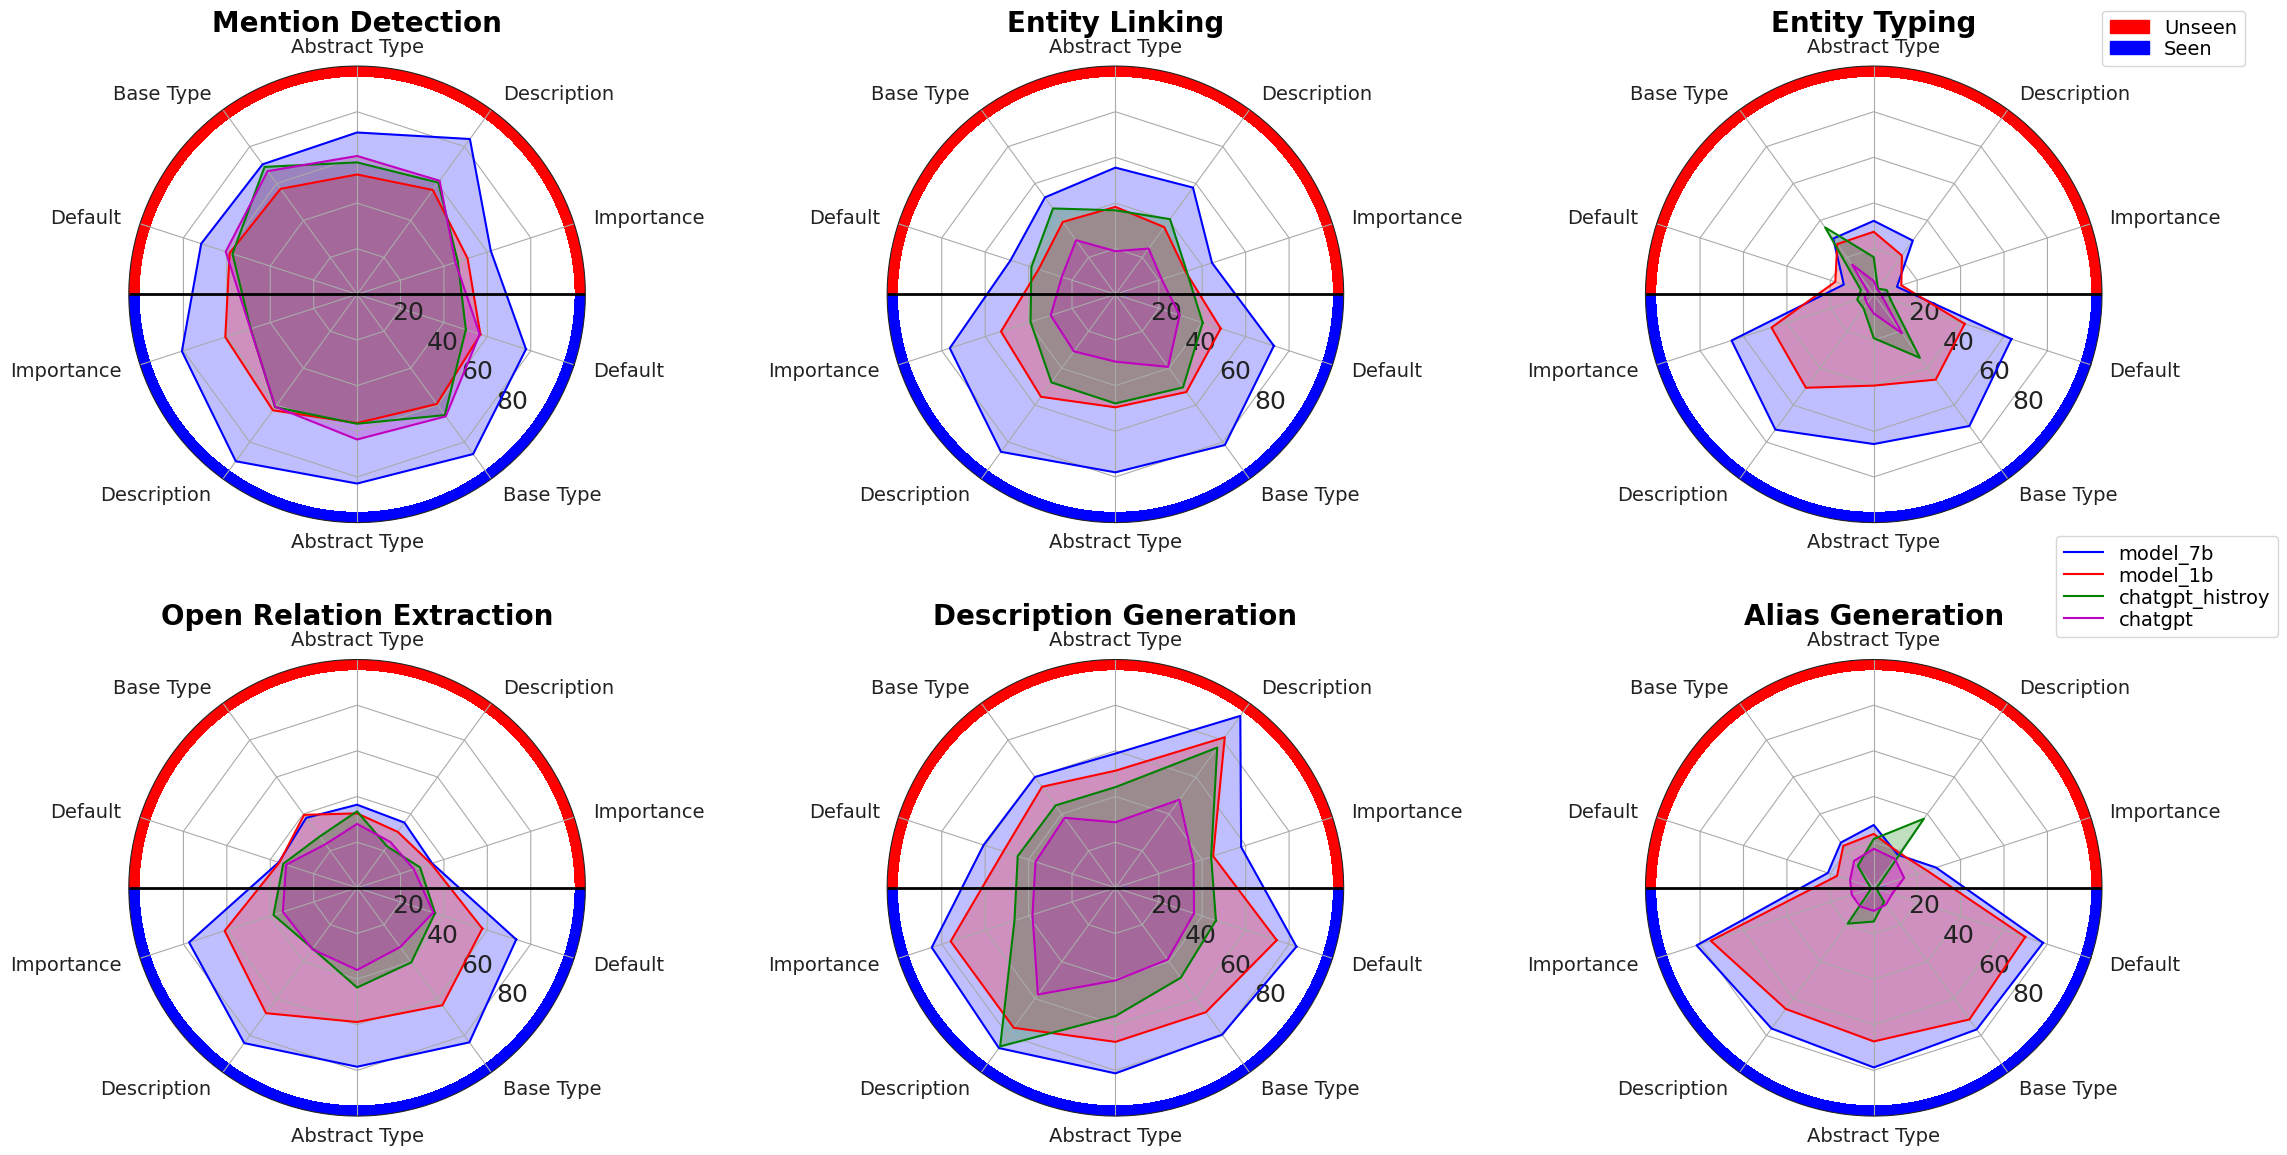

In [30]:
title_font_size = 20
tick_font_size = 18
label_font_size = 14

N = 10
theta = radar_factory(N, frame='circle')
spoke_labels = labels * 2

fig, axs = plt.subplots(
    figsize=(30, 15), nrows=2, ncols=3,
    subplot_kw=dict(projection='radar')
)

fig.subplots_adjust(wspace=0.3, hspace=0.3, top=0.8, bottom=0.1, left=0.1, right=0.8)
colors = ['b', 'r', 'g', 'm']
for ax, (title, case_data) in zip(axs.flat, all_results):
        ax.set_ylim(0, 100)
        ax.set_rgrids([20, 40, 60, 80])
        ax.set_title(title, weight='bold', size=title_font_size, position=(0.5, 1.6),
                     horizontalalignment='center', verticalalignment='center')
        for d, color in zip(case_data, colors):
            ax.plot(theta, d, color=color)
            ax.fill(theta, d, facecolor=color, alpha=0.25, label='_nolegend_')
        ax.set_varlabels(spoke_labels)
        ax.set_theta_offset(-theta[1] / 2)
        ax.set_theta_direction(-1)

        for label, angle in zip(ax.get_xticklabels(), theta):
            label.set_fontsize(label_font_size)
            if angle in (0.4 * np.pi, 1.4 * np.pi):
                label.set_horizontalalignment('center')
            elif np.pi/2 <= angle < 3* np.pi / 2:
                label.set_horizontalalignment('right')
            else:
                label.set_horizontalalignment('left')
        
        #ax.set_facecolor('#AAAAAA')
        ax.fill_betweenx(theta, 0, 100)
        ax.spines['polar'].set_color('#222222')
        ax.grid(color='#AAAAAA')
        ax.tick_params(axis='y', labelsize=tick_font_size)
        ax.tick_params(colors='#222222')

        t = np.linspace(0,2*np.pi, 500)
        r = np.linspace(97, 100, 2) 
        rg, tg = np.meshgrid(r,t)
        c = (tg < np.pi - theta[1]/2) + (2*np.pi - theta[1]/2 < tg).astype(int)
        cMap = mpl.colors.ListedColormap(['r', 'b'])
        pc = ax.pcolor(t, r, c.T, cmap=cMap)

        ax.vlines(-theta[1]/2, 0, 100, color='black', linewidth=2)
        ax.vlines(np.pi-theta[1]/2, 0, 100, color='black', linewidth=2)


# add legend relative to top-left plot
legend_labels = methods
handle_labels = [
    mpatches.Patch(color='r', label='Unseen'),
    mpatches.Patch(color='b', label='Seen')]
axs[0][-1].legend(handles=handle_labels, loc=(1, 1),
              labelspacing=0.1, fontsize=label_font_size)
axs[1][-1].legend(legend_labels, loc=(0.9, 1.05),
                            labelspacing=0.1, fontsize=label_font_size)
plt.show()

In [123]:
methods = ['chatgpt', 'chatgpt_histroy', 'model_1b', 'model_7b']
key_maps = {
    "decoder_failure_rate": ('aug_default', 'aug_base_type', 'aug_rollup_type', 'aug_description', 'aug_importance', 'aug_ent_num', 'aug_ent_num_and_base_type', 'aug_ent_num_and_rollup_type', None),
    "ent_num_constraint": ('aug_ent_num', 'aug_importance', 'aug_ent_num_and_base_type', 'aug_ent_num_and_rollup_type', None),
    "ent_type_constraint": ('aug_base_type', 'aug_rollup_type', 'aug_ent_num_and_base_type', 'aug_ent_num_and_rollup_type', None),
}

def get_results(all_result_collect, task):
    results = defaultdict(list)
    for key in key_maps[task]:
        for method in methods:
            score = float(get_final_results(all_result_collect[method],
                    task=task,
                    aug_type=key,
                    metric=None,
                    neg = (task != 'decoder_failure_rate')
                ).split("_")[0][1:])
            results[method].append(score)
    return results

all_results = []
all_results.append(('decoder_failure_rate', list(get_results(all_handle_results, 'decoder_failure_rate').values())))
all_results.append(('ent_num_constraint', list(get_results(all_handle_results, 'ent_num_constraint').values())))
all_results.append(('ent_type_constraint', list(get_results(all_handle_results, 'ent_type_constraint').values())))

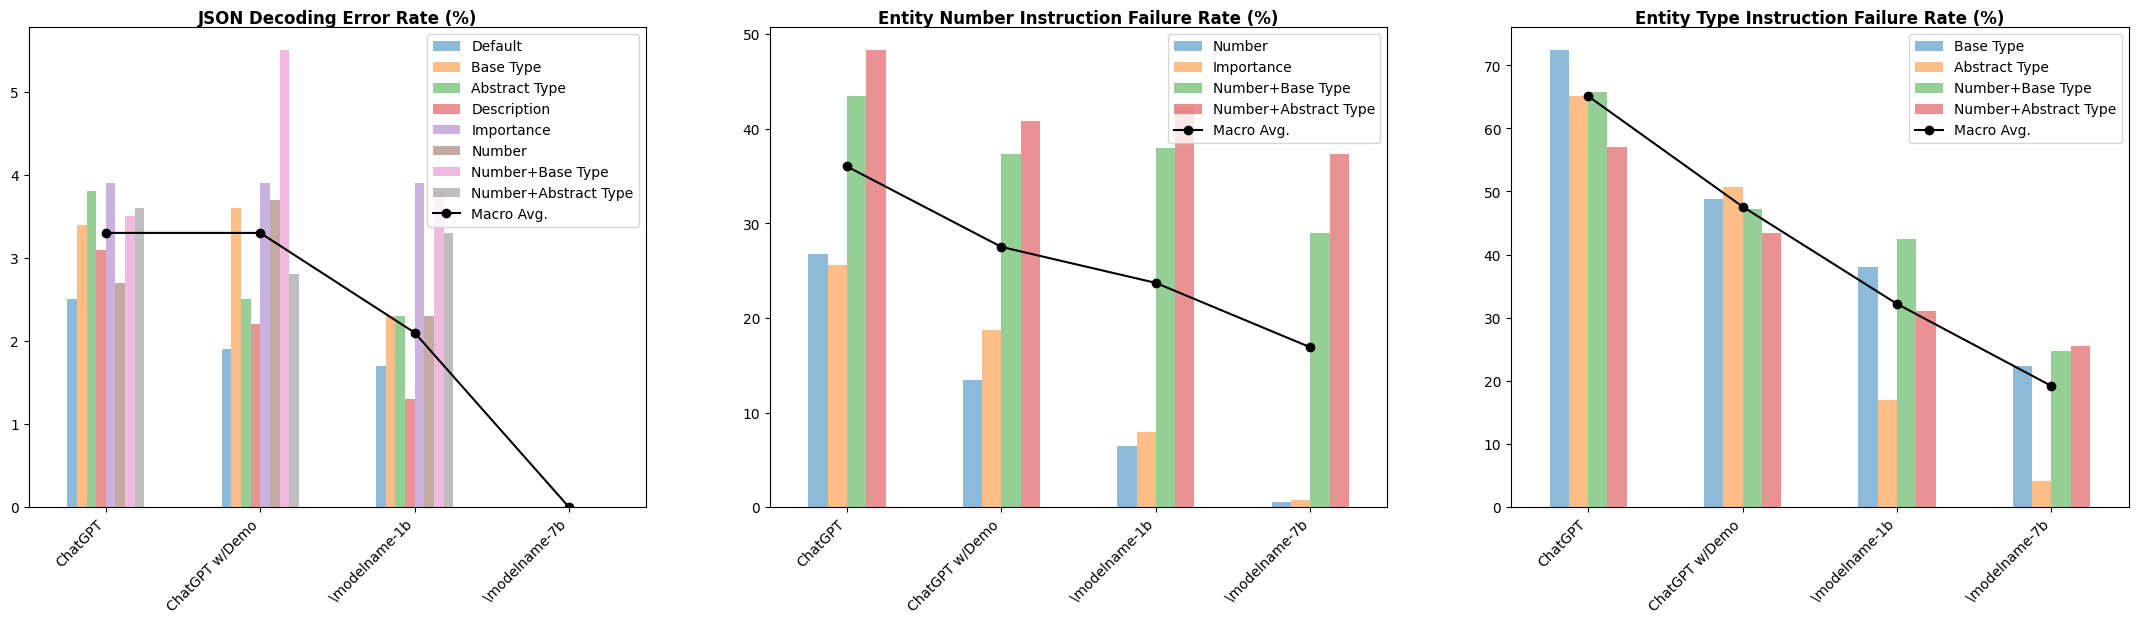

In [127]:
import pandas as pd

title_mapping = {
    "decoder_failure_rate": "JSON Decoding Error Rate (%)",
    "ent_num_constraint": "Entity Number Instruction Failure Rate (%)",
    "ent_type_constraint": "Entity Type Instruction Failure Rate (%)",
}
fig, axs = plt.subplots(figsize=(30, 8), nrows=1, ncols=3)
fig.subplots_adjust(wspace=0.2, hspace=0.2, top=0.8, bottom=0.1, left=0.1, right=0.8)
for f_id, (task, results) in enumerate(all_results):
    headers = [type_mapping[h] if h else 'avg' for h in  key_maps[task]]
    results = np.array(results)
    df_dict = {}
    for i in range(len(headers)):
        df_dict[headers[i]] = results[:, i]
    df = pd.DataFrame(df_dict)
    if task == 'decoder_failure_rate':
        df.iloc[2, :] = [1.7, 2.3, 2.3, 1.3, 3.9, 2.3, 3.8, 3.3, 2.1]
    df['method'] = [method_mapping[m] for m in methods]

    instructions = list(df.columns)
    instructions.remove('avg')
    instructions.remove('method')
    avg_df = df.pop('avg')

    df.plot(kind='bar', x='method', y=instructions, ax=axs[f_id], alpha=0.5)
    avg_df.plot(x='method', y='avg', ax=axs[f_id], style='o-', color='black', markerfacecolor='black', legend=True, label='Macro Avg.')

    axs[f_id].set_xlabel(None)
    axs[f_id].set_title(title_mapping[task], weight='bold', size=12, position=(0.5, 3),
                     horizontalalignment='center', verticalalignment='center')

    axs[f_id].set_xticklabels(labels=df['method'])
fig.autofmt_xdate(rotation=45)
plt.show()

## Case Study

In [46]:
new_relations = sum([all_results[key]['new_relation'] for key in all_results], [])

new_relation_dict = {
    "pred_mention_hallucination": [],
    "true_mention_unlabel": [],
    "relation_unlabel": []
}

for new_rel in new_relations:
    if not new_rel['pred_head_title'] or not new_rel['pred_tail_title']:
        new_relation_dict['pred_mention_hallucination'].append(new_rel)
    elif new_rel['true_head_title'] is None or new_rel['true_tail_title'] is None:
        new_relation_dict['true_mention_unlabel'].append(new_rel)
    else:
        new_relation_dict['relation_unlabel'].append(new_rel) 

In [47]:
for key in new_relation_dict:
    print(key, len(new_relation_dict[key]))

pred_mention_hallucination 93
true_mention_unlabel 27448
relation_unlabel 39157


In [48]:
uncovered_id_rels, uncovered_ood_rels, other_rels = [], [], []
for each in new_relation_dict['relation_unlabel']:
    if each['pred_head_title'] == each['true_head_title'][0] and each['pred_tail_title'] == each['true_tail_title'][0]:
        if each['true_head_title'][1] != 'in' or each['true_tail_title'][1] != 'in':
            uncovered_ood_rels.append(each)
        else:
            uncovered_id_rels.append(each)
    else:
        other_rels.append(each)

In [49]:
len(uncovered_id_rels), len(uncovered_ood_rels), len(other_rels)

(13602, 3554, 22001)

In [73]:
merge_uncovered_id_rels = defaultdict(list)
for each in uncovered_id_rels:
    if each['pred_head_title'] != each['pred_tail_title']:
        merge_uncovered_id_rels[(each['pred_head_title'], each['pred_tail_title'], each['rel'])].append(each)
sorted_merge_uncovered_id_rels = list(map(lambda x: {"triplet": x[0], "n_evi": len(x[1]), "evidence": x[1]}, sorted(merge_uncovered_id_rels.items(), key=lambda x: -len(x[1]))))
with open("/harddisk/user/keminglu/evaluation_corpus/case_study/new_relations/7b_new_relations_uncovered_id.jsonl", "w") as f:
    for item in sorted_merge_uncovered_id_rels:
        f.write(json.dumps(item) + "\n")

In [74]:
merge_uncovered_ood_rels = defaultdict(list)
for each in uncovered_ood_rels:
    if each['pred_head_title'] != each['pred_tail_title']:
        merge_uncovered_ood_rels[(each['pred_head_title'], each['pred_tail_title'], each['rel'])].append(each)
sorted_merge_uncovered_ood_rels = list(map(lambda x: {"triplet": x[0], "n_evi": len(x[1]), "evidence": x[1]}, sorted(merge_uncovered_ood_rels.items(), key=lambda x: -len(x[1]))))
with open("/harddisk/user/keminglu/evaluation_corpus/case_study/new_relations/7b_new_relations_uncovered_ood.jsonl", "w") as f:
    for item in sorted_merge_uncovered_ood_rels:
        f.write(json.dumps(item) + "\n")

# New Entities

In [7]:
entity_mapping = json.load(open("/harddisk/data/nlp_data/kb/wikidata/20230301/mapping/sitelinks.enwiki.title.json"))

In [8]:
entity_set = set(entity_mapping.values())

In [9]:
def get_new_entities(data_split):
    new_entities = []
    for key in data_split:
        for sample in data_split[key]:
            try:
                outputs = load_outputs(sample)
            except (json.JSONDecodeError, TypeError, KeyError):
                continue
                
            for ent in outputs['entities']:

                if 'mention' in ent and 'title' in ent:
                    if ent['title'] not in entity_set:
                        new_entities.append((sample['inputs'], ent))
    return new_entities

In [10]:
all_results = defaultdict(dict)
for data_file in data_files:
    data_split = load_data(data_dir, data_file)
    all_results[data_file]['new_entities'] = get_new_entities(data_split)

In [12]:
new_entities = sum([all_results[key]['new_entities'] for key in all_results], [])
new_entities = sorted(new_entities, key=lambda x: -len(x[1]))

In [14]:
with open("/harddisk/user/keminglu/evaluation_corpus/case_study/new_relations/7b_new_entities.jsonl", "w") as f:
    for each in new_entities:
        f.write(json.dumps(each) + "\n")

# GPT-4

In [90]:
with open("/harddisk/user/keminglu/evaluation_corpus/case_study/new_relations/7b_new_relations_uncovered_ood.jsonl") as f:
    data = [json.loads(line) for line in f]

In [91]:
sample = [each for each in data if each['triplet'][-1] == 'member of political party'][0]
sample

{'triplet': ['Bushy Maape',
  'African National Congress',
  'member of political party'],
 'n_evi': 7,
 'evidence': [{'context': 'The Executive Council of the North West is the cabinet of the executive branch of the provincial government in the South African province of the North West. The Members of the Executive Council (MECs) are appointed from among the members of the North West Provincial Legislature by the Premier of the North West, an office held since September 2021 by Bushy Maape of the African National Congress (ANC).',
   'head_m': 'Bushy Maape',
   'tail_m': 'African National Congress',
   'pred_head_title': 'Bushy Maape',
   'pred_tail_title': 'African National Congress',
   'pred_head_info': {'title': 'Bushy Maape',
    'type': ['Human'],
    'description': 'South African politician',
    'aliases': ['Bushy']},
   'pred_tail_info': {'title': 'African National Congress',
    'type': ['Political party'],
    'description': 'political party in South Africa',
    'aliases': 

In [81]:
def get_string_info(info, role):
    ent_info = f"[{role} entity] {info['title']}\n"
    if 'type' in info:
        ent_info += f"[{role} type] {', '.join(info['type'])}\n"
    if 'description' in info:
        ent_info += f"[{role} description] {info['description']}\n"
    if 'aliases' in info:
        ent_info += f"[{role} aliases] {', '.join(info['aliases'])}\n"
    return ent_info

In [88]:
def get_prompt(sample):
    prompt = [f"The following are information of an entity pair and a set of evidence paragraphs describing their relations.\n"]
    prompt.append(get_string_info(sample['evidence'][0]['pred_head_info'], "head"))
    prompt.append(get_string_info(sample['evidence'][0]['pred_tail_info'], "tail"))
    evidence = list(set([(evi['context'], evi['head_m'], evi['tail_m']) for evi in sample['evidence']]))
    evidence = [f"[evidence paragraph {idx}] {c}\n[head mention] {h}\n[tail mention] {t}\n" for idx, (c, h, t) in enumerate(evidence)]
    prompt += evidence
    prompt.append("[relation] The relation between head entity ``%s'' and tail entity ``%s'' is ``%s''.\n" % tuple(sample['triplet']))
    prompt.append("Please judge whether this relation is correct based on your knowledge and these evidence paragraphs. Please provide indices of evidence paragraphs that can support your judgement and provide explanations.")
    prompt = '\n'.join(prompt)
    return prompt

In [89]:
with open("/harddisk/user/keminglu/evaluation_corpus/case_study/new_relations/prompt_case.txt", "w") as f:
    prompt = get_prompt(sample)
    f.write(prompt)

# Study of New Ontology

In [16]:
with open("/harddisk/user/keminglu/evaluation_corpus/case_study/new_relations/7b_new_entities.jsonl") as f:
    data = [json.loads(line) for line in f]

In [28]:
with open("/data/home/keminglu/workspace/pretrained_data_processed/wikipedia_with_mention_wo_title_simplified_aug/train_entities.json") as f:
    train_entities = set(json.load(f))

In [29]:
seen_ents, unseen_ents = [], []
for sample in data:
    if sample[1]['title'] in train_entities:
        seen_ents.append(sample)
    else:
        unseen_ents.append(sample)

In [30]:
len(seen_ents), len(unseen_ents), len(data)

(5121, 24110, 29231)

In [39]:
counter = defaultdict(lambda: 0)
for sample in unseen_ents:
    if 'type' in sample[1]:
        for t in sample[1]['type']:
            counter[t] += 1
sorted(counter.items(), key=lambda x: -x[1])[:20]

[('Human', 4709),
 ('Ethnic group', 979),
 ('İlçe', 702),
 ('Film', 677),
 ('Season (sports)', 356),
 ('Television series', 354),
 ('City', 320),
 ('Village', 308),
 ('Human settlement', 299),
 ('Wikipedia:Lists', 297),
 ('Business', 239),
 ('Television show', 211),
 ('Tribe', 189),
 ('Surname', 178),
 ('Person', 169),
 ('Organization', 164),
 ('Sports competition', 164),
 ('Omnivore', 164),
 ('Band (rock and pop)', 158),
 ('Town', 152)]

In [45]:
from rouge import Rouge
from tqdm import tqdm
def get_max_rouge(key, targets):
    R = Rouge()
    max_rouge = 0
    max_target = None
    for target in tqdm(targets):
        score = R.get_scores(target, key)[0]['rouge-l']['f']
        if score > max_rouge:
            max_rouge = score
            max_target = target
    return max_target, max_rouge

In [41]:
unseen_ents[0]

['"GingaMingaYo (The Strange World)" (from , meaning "uncertain") is a song recorded by South Korean girl group Billlie for their second extended play "The Collective Soul and Unconscious: Chapter One". It was released as the lead single by Mystic Story on February 23, 2022. It was written by Le\'mon and Hyuk Shin, MRey, Ashley Alisha and Le\'mon of 153/Joombas worked on composing while Han Peacedelic Jungsu produced the song. "GingaMingaYo" is a pop song with elements of bass house. Lyrically, It contains the questions and emotions that one asks himself during the process of becoming an adult.',
 {'mention': '153',
  'title': '153 (group)',
  'type': ['Girl group'],
  'description': 'South Korean girl group',
  'aliases': ['Fainted']}]

In [46]:
get_max_rouge('153 (group)', train_entities)

100%|██████████| 2234052/2234052 [01:34<00:00, 23599.89it/s]


('Cleopatra (group)', 0.4999999950000001)

In [62]:
with open("/harddisk/user/keminglu/evaluation_corpus/case_study/new_relations/7b_new_relations_uncovered_id.jsonl") as f:
    id_new_rels = [json.loads(line) for line in f]
counter = defaultdict(lambda: 0)
for sample in id_new_rels:
    r = sample['triplet'][-1]
    counter[r] += 1
top20_rels = sorted(counter.items(), key=lambda x: -x[1])[:20]
bottom20_rels = sorted(counter.items(), key=lambda x: x[1])[:20]
top20_rels

[('located in the administrative territorial entity', 141),
 ('sport', 65),
 ('record label', 58),
 ('shares border with', 57),
 ('place of birth', 56),
 ('genre', 53),
 ('location', 52),
 ('part of', 46),
 ('headquarters location', 44),
 ('place of death', 43),
 ('country', 42),
 ('owned by', 38),
 ('subclass of', 37),
 ('has part', 31),
 ('cast member', 27),
 ('league', 24),
 ('languages spoken, written or signed', 21),
 ('organizer', 20),
 ('instance of', 18),
 ('owner of', 18)]

In [61]:
bottom20_rels

[('illustrator', 1),
 ('represented by', 1),
 ('interested in', 1),
 ('temporal range start', 1),
 ('temporal range end', 1),
 ('encodes', 1),
 ('office held by head of state', 1),
 ('party chief representative', 1),
 ('affiliation', 1),
 ('industry', 1),
 ('chief executive officer', 1),
 ('from narrative universe', 1),
 ('copyright license', 1),
 ('series spin-off', 1),
 ('theme music', 1),
 ('separated from', 1),
 ('victory', 1),
 ('place of burial', 1),
 ('subject has role', 1),
 ('appointed by', 1)]

In [63]:
with open("/harddisk/user/keminglu/evaluation_corpus/case_study/new_relations/7b_new_relations_uncovered_ood.jsonl") as f:
    ood_new_rels = [json.loads(line) for line in f]
counter = defaultdict(lambda: 0)
for sample in ood_new_rels:
    r = sample['triplet'][-1]
    counter[r] += 1
top20_rels = sorted(counter.items(), key=lambda x: -x[1])[:20]
bottom20_rels = sorted(counter.items(), key=lambda x: x[1])[:20]
top20_rels

[('part of', 89),
 ('located in the administrative territorial entity', 85),
 ('country', 78),
 ('sport', 52),
 ('performer', 40),
 ('instance of', 37),
 ('genre', 28),
 ('record label', 27),
 ('contains administrative territorial entity', 20),
 ('has part', 17),
 ('member of political party', 17),
 ('original broadcaster', 16),
 ('subclass of', 16),
 ('author', 16),
 ('country of citizenship', 15),
 ('cast member', 15),
 ('location', 13),
 ('director', 13),
 ('publisher', 11),
 ('part of the series', 10)]

In [64]:
bottom20_rels

[('crosses', 1),
 ('movement', 1),
 ('winner', 1),
 ('affiliation', 1),
 ('represented by', 1),
 ('item operated', 1),
 ('product or material produced', 1),
 ('surface played on', 1),
 ('mountain range', 1),
 ('use', 1),
 ('form of creative work', 1),
 ('developer', 1),
 ('nominated for', 1),
 ('location of formation', 1),
 ('has works in the collection', 1),
 ('pole position', 1),
 ('lyrics by', 1),
 ('diocese', 1),
 ('has boundary', 1),
 ('located on terrain feature', 1)]